In [1]:
from noisygamesutil import *
import matplotlib.pyplot as plt

In [2]:
#objective here is to get the multi round performance of player0
#up against everything else. Between random play is uninteresting
#from that we can build a plot of a given strategy's performance against
#differing amounts of randomness

In [3]:
base_dir = "/home/kennethmclarney/Documents/RustProjects/noisygames/test_runs/Year2022Month1Day23Hour5Min29Sec3/"
#great, now I've got a nice setup to organize results.
players_struct = build_players_struct(base_dir)

player_name='player0'
tested_strat='GrimTrigger'
matchups=list(players_struct[player_name].keys())
all_matches = {}


In [4]:
probs=[]
for matchup in matchups:
    match=load_matchup_files(players_struct,player_name,matchup)
    strat=list(match[0]['player_b'].keys())[0]
    prob = match[0]['player_b'][strat]['player']['probability']*100
    probs.append(prob)
    prob_str=str(prob)
    strat_id=strat+'_'+prob_str
    matchup_score = get_matchup_scores(match,player_name,matchups[0])[0]
    all_matches[strat_id]=matchup_score

In [5]:
probs.sort()
prob_strings = []
for prob in probs:
    prob_strings.append("RandomDefect_"+str(prob))
    
values=[]
for s in prob_strings:
    values.append(all_matches[s])

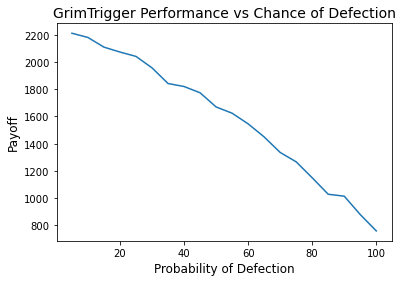

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.plot(probs,values)
plt.title(tested_strat+' Performance vs Chance of Defection',fontsize=14)
plt.xlabel('Probability of Defection',fontsize=12)
plt.ylabel('Payoff',fontsize=12)
#plt.savefig(tested_strat+"Randomized.jpg")
plt.show()